<a href="https://colab.research.google.com/github/clrssxa/DiabetesClassification/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library and Overview

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm,skew
from scipy import stats
import statsmodels.api as sm

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

#Data Visualization

import seaborn as sns
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Digital Skola/Final Project/Diabetes/diabetes.csv')
df.tail(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#EDA

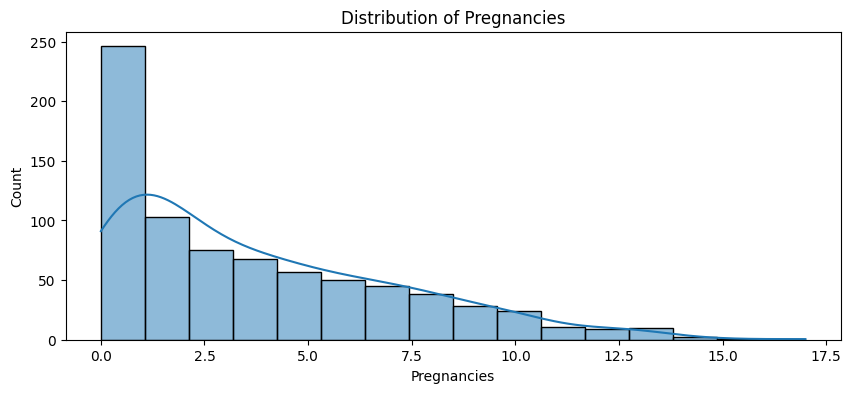

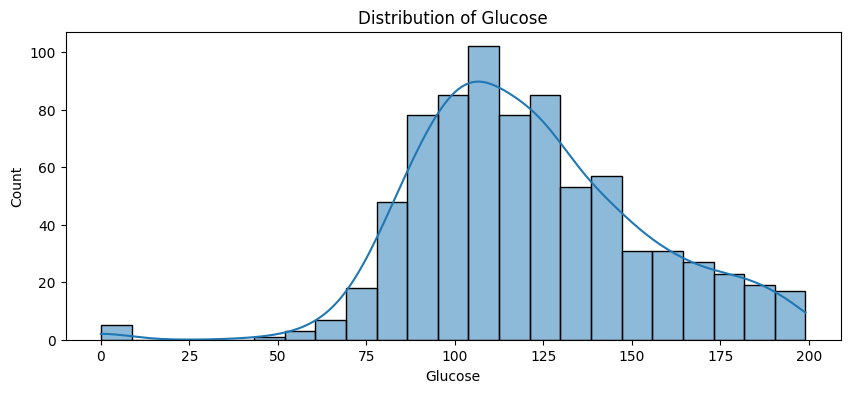

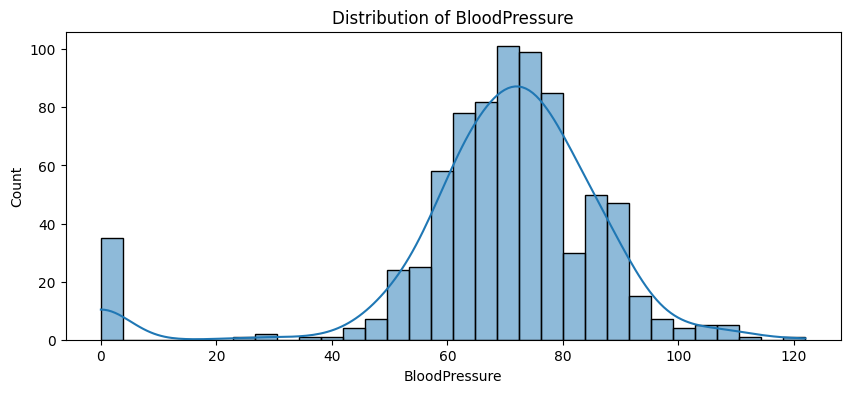

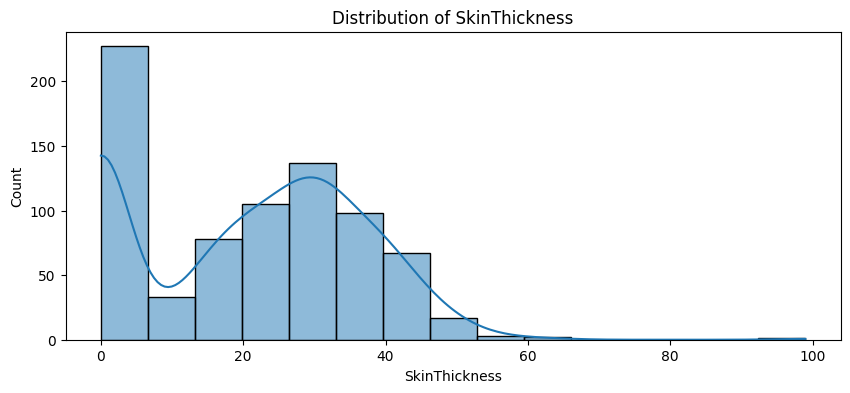

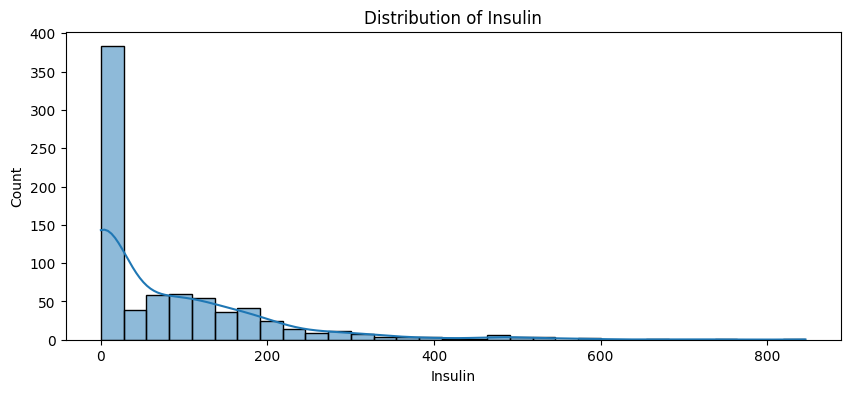

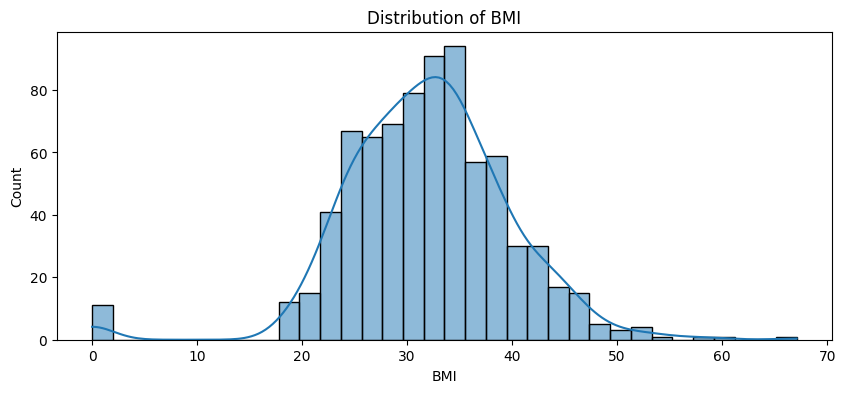

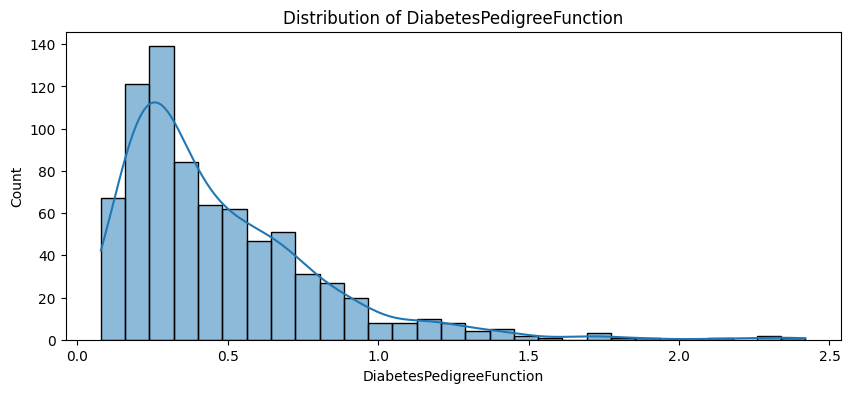

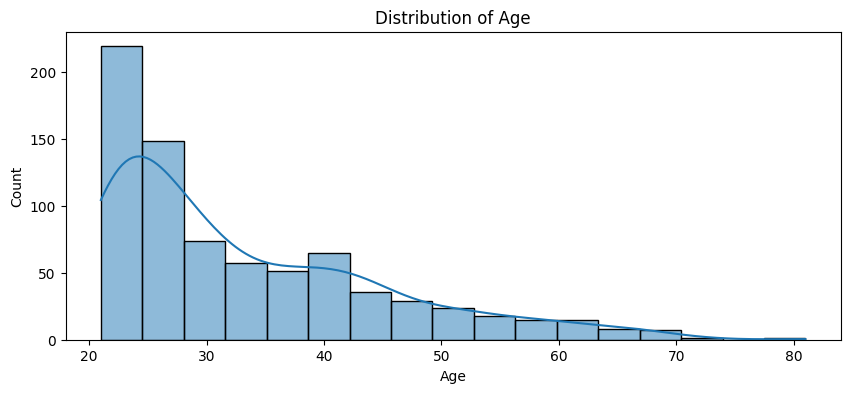

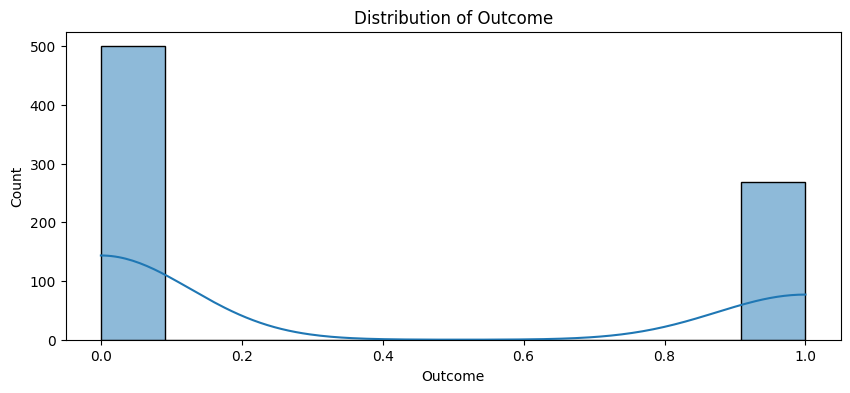

In [ ]:
#Persebaran data Setiap Variabel
for feature in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

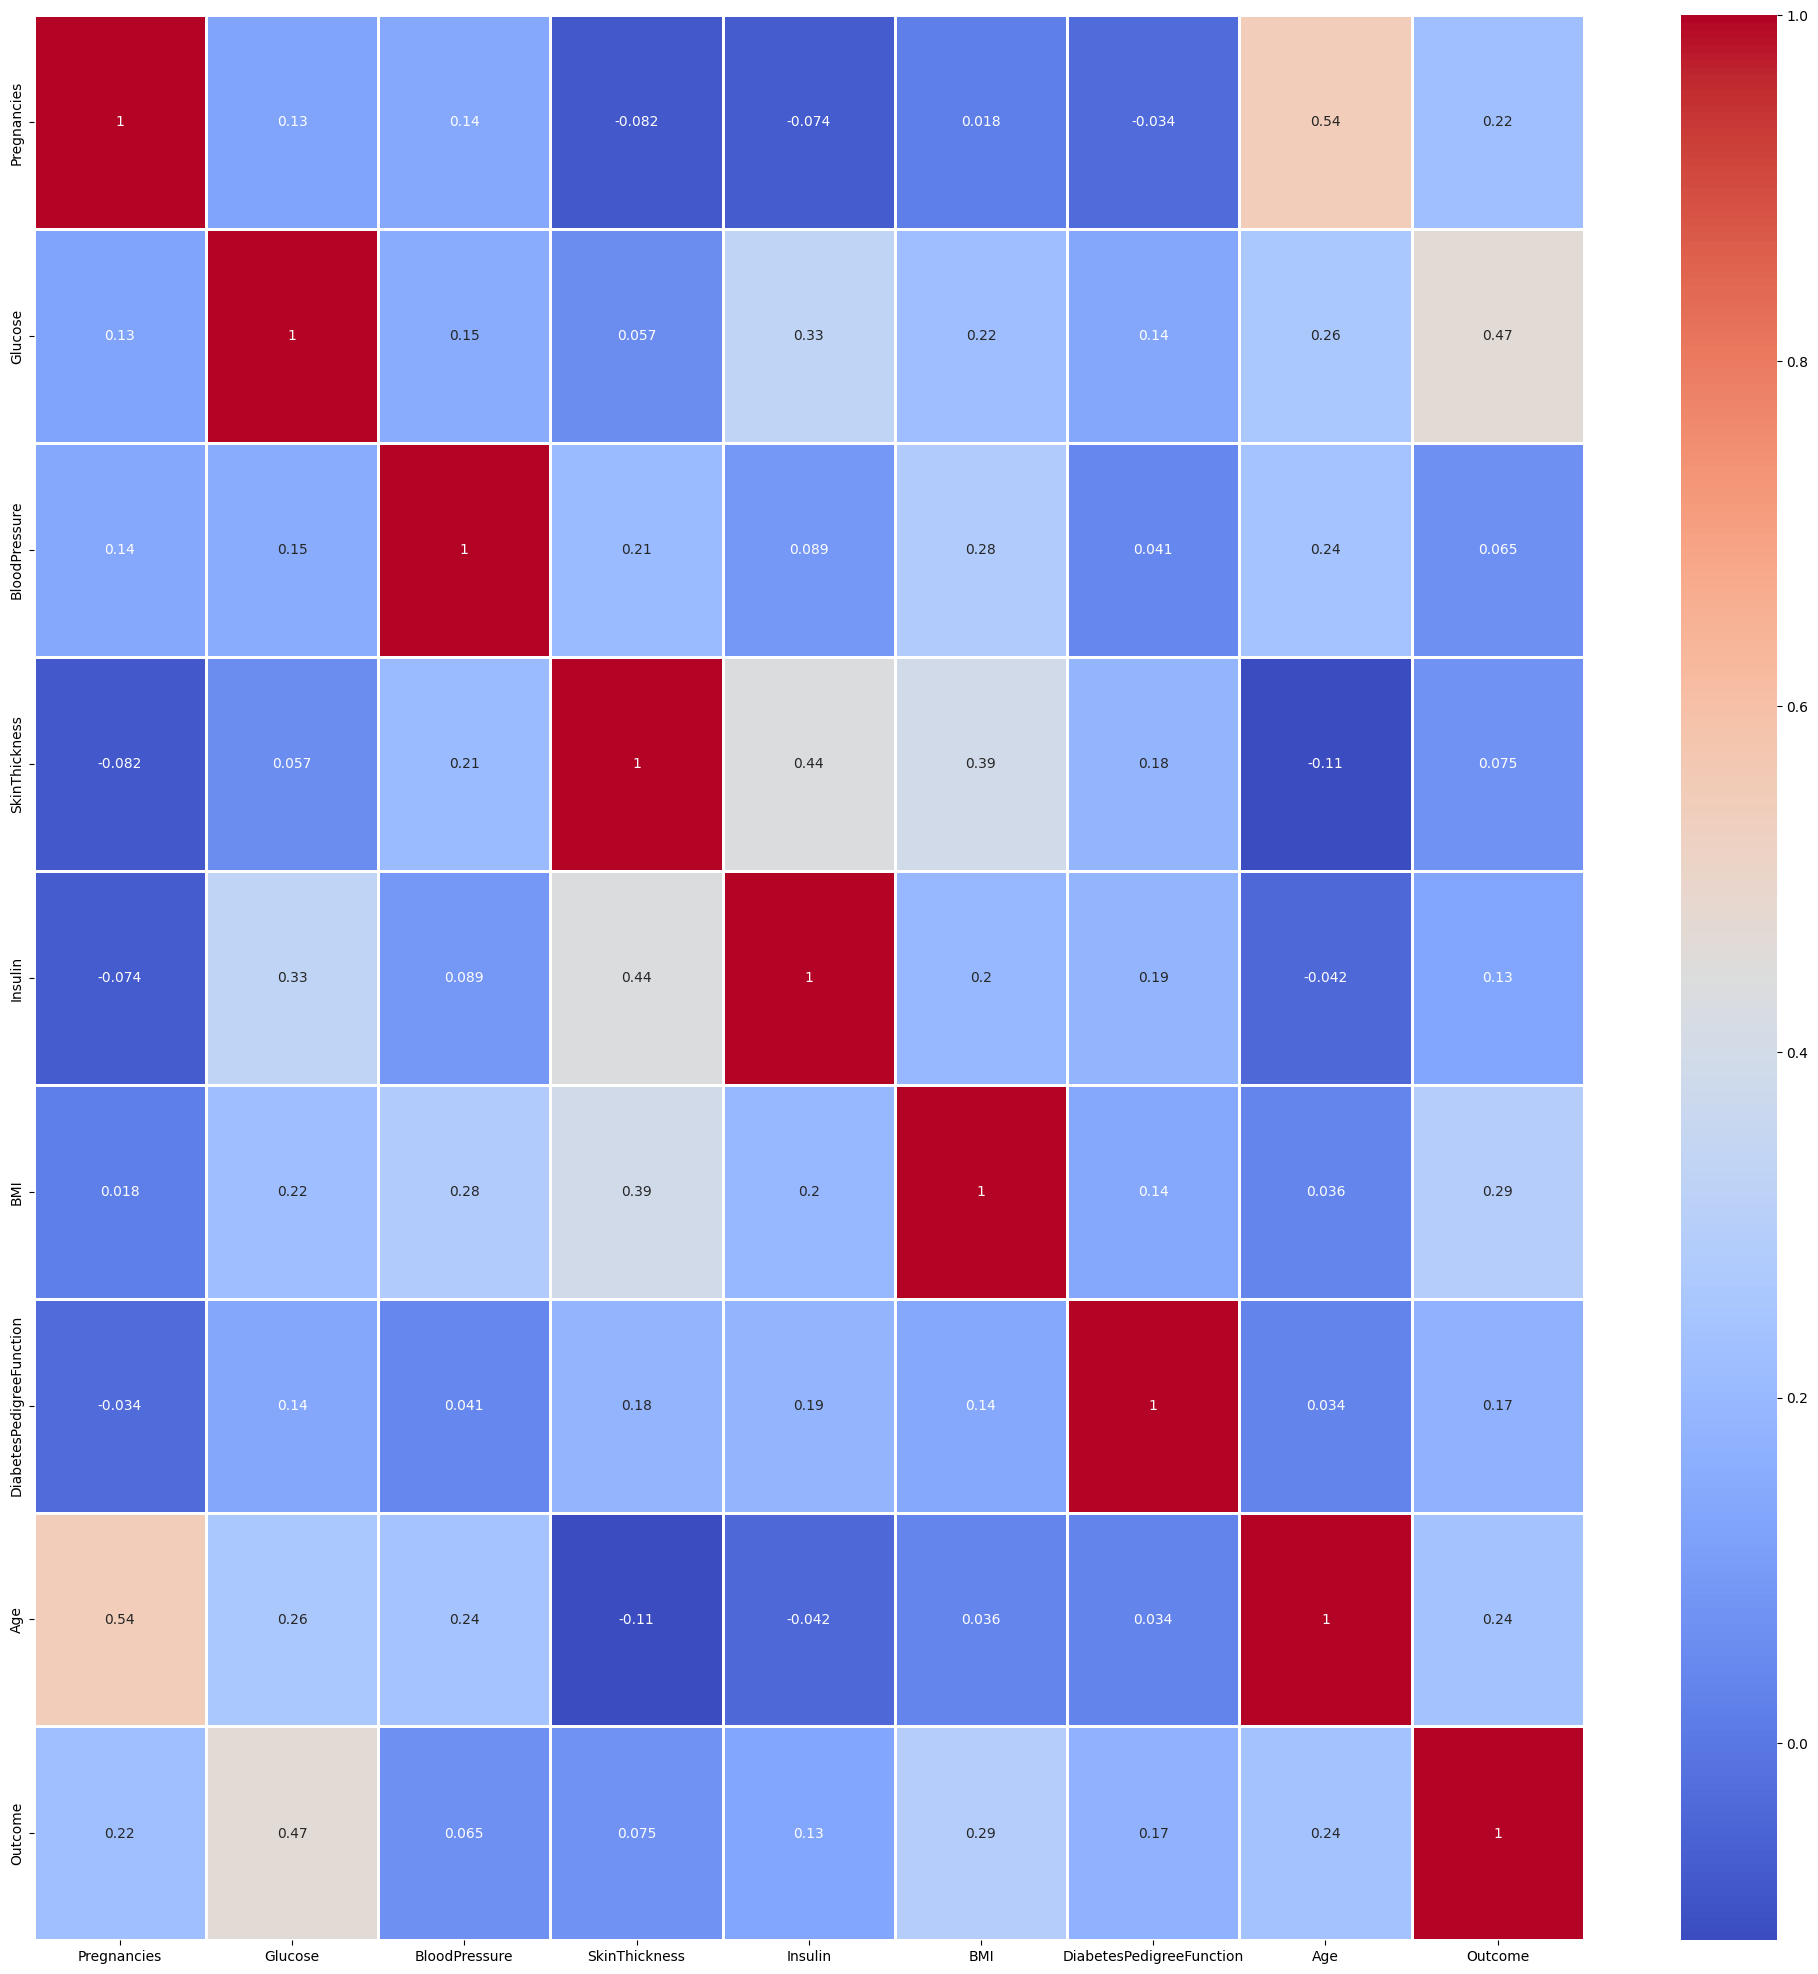

In [ ]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [ ]:
df2 = df[:] #biar main datanya ga berubah
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<ipython-input-12-5d6eeb9bec66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BMI_Class'] = pd.cut(df2['BMI'], bins=[18.5,25,30,100], labels=['Normal','Overweight','Obese'])
<ipython-input-12-5d6eeb9bec66>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BloodPressure_Class'] = pd.cut(df2['BloodPressure'], bins=[0,80,90,100,150], labels=['Normal','Pra-Hipertensi','Hipertensi I','Hipertensi II'])
<ipython-input-12-5d6eeb9bec66>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy 

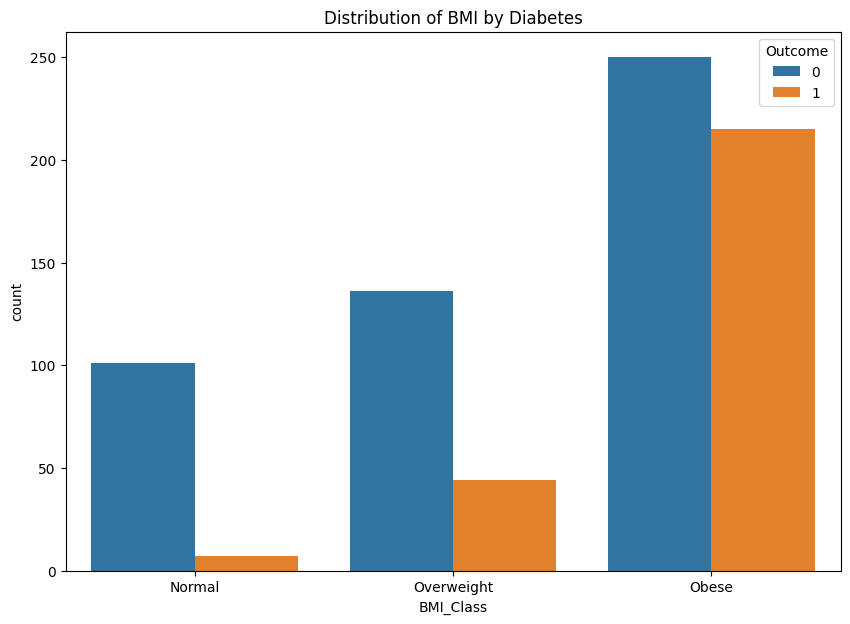

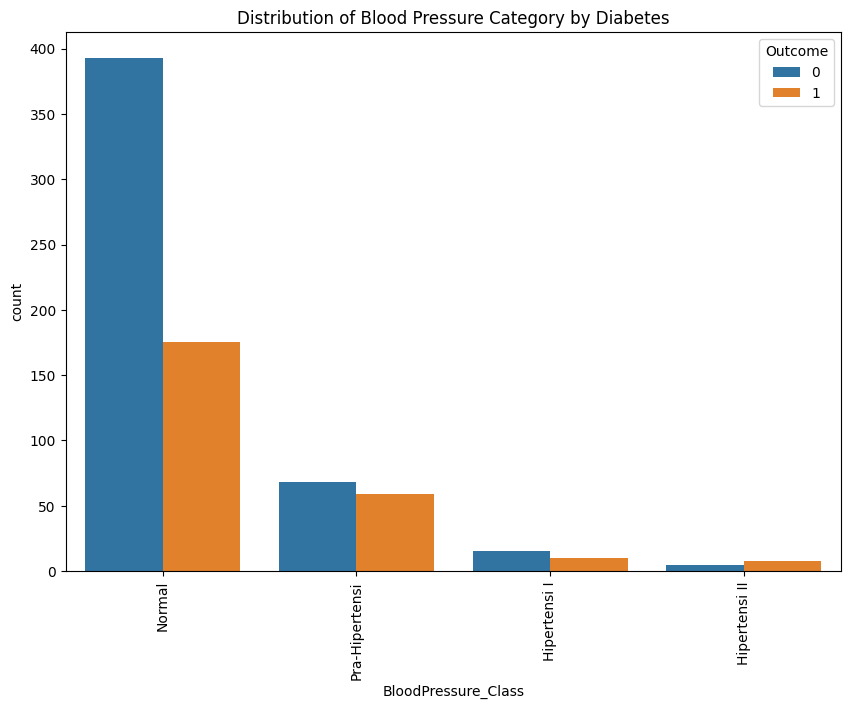

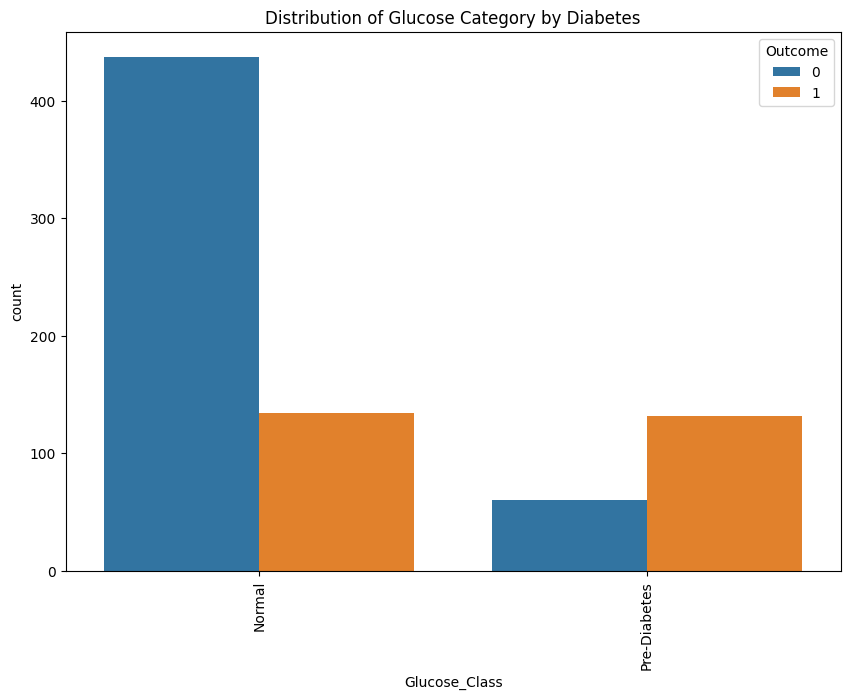

In [ ]:
# Analyze the relationship between diabetes, BMI, bloodpressure and glucose

#1 mengkategorikan BMI

df2['BMI_Class'] = pd.cut(df2['BMI'], bins=[18.5,25,30,100], labels=['Normal','Overweight','Obese'])

plt.figure(figsize=(10, 7))
sns.countplot(data=df2, x='BMI_Class', hue='Outcome')
plt.title('Distribution of BMI by Diabetes')


#2 Kategorikan Blood Pressure (refrers to kemenkes)

df2['BloodPressure_Class'] = pd.cut(df2['BloodPressure'], bins=[0,80,90,100,150], labels=['Normal','Pra-Hipertensi','Hipertensi I','Hipertensi II'])

plt.figure(figsize=(10, 7))
sns.countplot(data=df2, x='BloodPressure_Class', hue='Outcome')
plt.title('Distribution of Blood Pressure Category by Diabetes')
plt.xticks(rotation=90)

#Kategorikan Kadar Glukosa (referes to siloam hospital website)

df2['Glucose_Class'] = pd.cut(df2['Glucose'], bins=[0,140,200], labels=['Normal','Pre-Diabetes'])

plt.figure(figsize=(10, 7))
sns.countplot(data=df2, x='Glucose_Class', hue='Outcome')
plt.title('Distribution of Glucose Category by Diabetes')
plt.xticks(rotation=90)

plt.show()


#Big Data For Machine Learning


> Test split train and test



Scalling

In [ ]:
# Bagi Data
response = df["Outcome"]

df = df.drop(columns="Outcome")

X_train, X_test, y_train, y_test = train_test_split(df, response,
                                                    stratify=response,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (614, 8)
Number transactions y_train dataset:  (614,)
Number transactions X_test dataset:  (154, 8)
Number transactions y_test dataset:  (154,)


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [ ]:
import pickle

scaler_filename = 'Robust_scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

Random Forest Model

In [ ]:
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)

#Cek Performa model
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       100
           1       0.78      0.59      0.67        54

    accuracy                           0.80       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.80      0.80      0.79       154



# Imbalance Dataset


> x_smote dan y_smote (y = df['Outcome'])



In [ ]:
pip install -U imbalanced-learn

In [ ]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

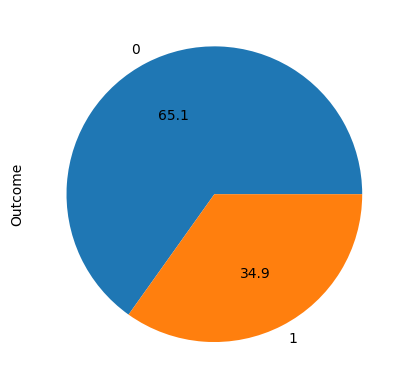

In [ ]:
y_train.value_counts().plot.pie(autopct='%.1f')

Oversampling SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#reduce besaran data yang paling banyak biar sama kaya data yang diabetes

sm = SMOTE(random_state=0)
#sampling SMOTE (bisa langsung work karena datanya angka semua, berarti lebih bagus kalo emang udah di label encoder/ one hot encoder)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

<Axes: ylabel='Outcome'>

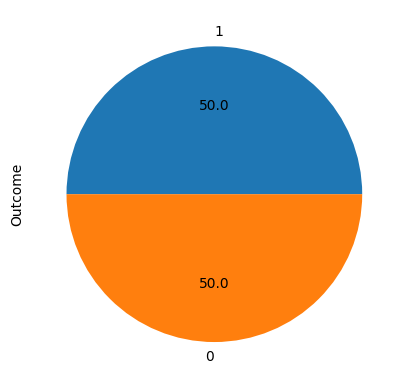

In [ ]:
y_train_smote.value_counts().plot.pie(autopct='%.1f')

In [ ]:
smote_model =  rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)

print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       100
           1       0.73      0.70      0.72        54

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



Saat menangani imbalance dataset gunaik SMOTE bisa diliat recall datanya berubah dari 0.63 jadi 0.72. Hal ini mengindikasikan bahwa kemampuan model ini menangkap kelas minoritas meningkat.

In [ ]:
#Evaluate results
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, smote_prediction )
prec = precision_score(y_test, smote_prediction )
rec = recall_score(y_test, smote_prediction )
f1 = f1_score(y_test, smote_prediction )
f2 = fbeta_score(y_test, smote_prediction, beta=2.0)
roc_auc = roc_auc_score(y_test, smote_prediction)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

print(model_results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score   ROC-AUC
0  Random Forest  0.805195   0.730769  0.703704  0.716981  0.708955  0.781852


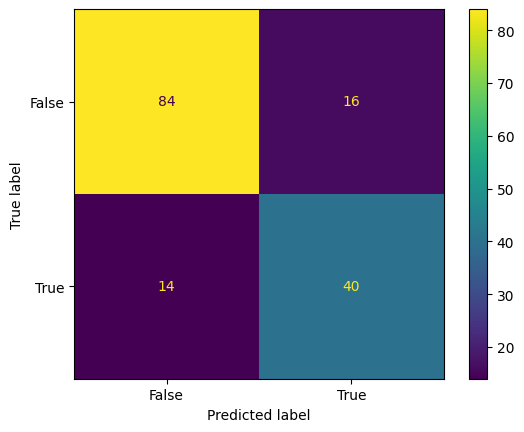

In [ ]:
cm = confusion_matrix(y_test, smote_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [ ]:
import pickle

In [ ]:
#saving the model for the app (pilih model terbaik)
pickle.dump(rf, open('Random_Forest_model.pkl','wb'))